In [1]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Traff_4.csv')

In [3]:
data['Label']

0         0
1         0
2         0
3         0
4         0
         ..
493771    3
493772    3
493773    3
493774    3
493775    3
Name: Label, Length: 493776, dtype: int64

In [4]:
looking_back = 20 

target = np.array(data['Label'])
data = data.drop('Label', axis = 1)
data = np.array(data)

In [5]:
target

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [6]:
x = []
y = [] 

for i in range(looking_back, len(data)): 
    x.append(data[i - looking_back:i, 0])
    y.append(target[i])
    
x, y = np.array(x), np.array(y)
y_target = keras.utils.to_categorical(y, 4)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

x.shape

(493756, 20, 1)

In [7]:
model = Sequential()

model.add(LSTM(units = 60, return_sequences = True, input_shape = (x.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 60))
model.add(Dropout(0.2))
model.add(Dense(units = 32))
model.add(Dense(units = 4, activation = 'softmax'))

# may be add more Dense layers

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 20, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 20, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60)                29040     
                                                                 
 dropout_2 (Dropout)         (None, 60)                0         
                                                                 
 dense (Dense)               (None, 32)                1

In [9]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(x, y_target, epochs = 10, batch_size = 32)

Epoch 1/10
15430/15430 [==============================] - 406s 26ms/step - loss: 0.0567 - accuracy: 0.9839
Epoch 2/10
15430/15430 [==============================] - 463s 30ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 3/10
15430/15430 [==============================] - 460s 30ms/step - loss: 0.0129 - accuracy: 0.9960
Epoch 4/10
15430/15430 [==============================] - 552s 36ms/step - loss: 0.0081 - accuracy: 0.9974
Epoch 5/10
15430/15430 [==============================] - 522s 34ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 6/10
15430/15430 [==============================] - 556s 36ms/step - loss: 0.0059 - accuracy: 0.9982
Epoch 7/10
15430/15430 [==============================] - 638s 41ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 8/10
15430/15430 [==============================] - 675s 44ms/step - loss: 0.0045 - accuracy: 0.9986
Epoch 9/10
15430/15430 [==============================] - 723s 47ms/step - loss: 0.0042 - accuracy: 0.9987
Epoch 10/10
15430/15430 [============

In [11]:
model.evaluate(x, y_target)

15430/15430 [==============================] - 241s 16ms/step - loss: 0.0011 - accuracy: 0.9997


[0.0010732646333053708, 0.9996779561042786]

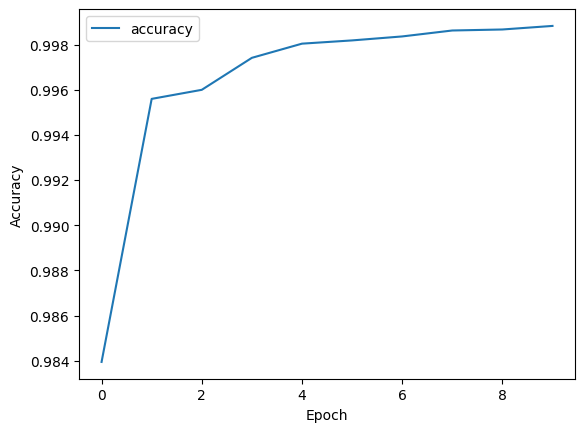

In [15]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

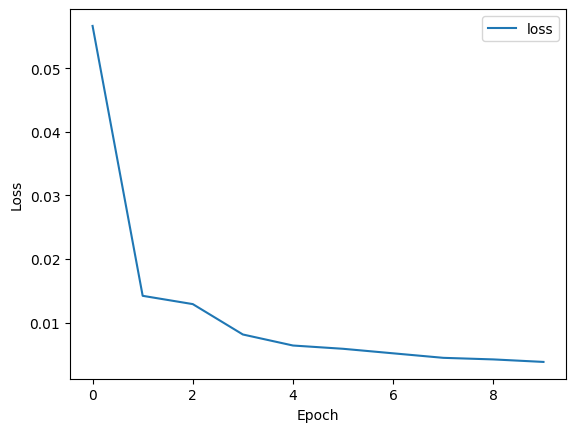

In [16]:
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
model.save('LSTM_Traff_four_classes.h5')

ТЕСТИРОВАНИЕ МОДЕЛИ

In [45]:
from keras.models import load_model
model = load_model('LSTM_Traff_four_classes.h5')

In [46]:
data = pd.read_csv('Tested_Traff_4.csv')

In [47]:
looking_back = 20 

target = np.array(data['Label'])
data = data.drop('Label', axis = 1)
data = np.array(data)

target

array([2, 2, 2, ..., 3, 3, 3], dtype=int64)

In [48]:
x = []
y = [] 

for i in range(looking_back, len(data)): 
    x.append(data[i - looking_back:i, 0])
    y.append(target[i])
    
x, y = np.array(x), np.array(y)
y_target = keras.utils.to_categorical(y, 4)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

x.shape

(5981, 20, 1)

In [49]:
model.evaluate(x, y_target)

187/187 [==============================] - 4s 15ms/step - loss: 0.0378 - accuracy: 0.9943


[0.03775990381836891, 0.9943153262138367]

In [52]:
model.weights

[<tf.Variable 'lstm/lstm_cell_6/kernel:0' shape=(1, 240) dtype=float32, numpy=
 array([[ 0.3265059 , -0.21859112,  0.34765133,  0.38582608,  0.2990908 ,
         -0.10281592, -0.10538904,  0.38100877,  0.36802772, -0.19202334,
         -0.06954604, -0.21168868,  0.3701569 , -0.21575867,  0.31961805,
          0.21485256, -0.05967889,  0.33688176, -0.2004787 ,  0.1810262 ,
          0.32967874,  0.37115163,  0.39020684, -0.10327464,  0.3429658 ,
          0.33216658,  0.38835102,  0.38781717,  0.39172563,  0.3378572 ,
          0.16322522,  0.36281505,  0.16027819, -0.18412204,  0.35032514,
          0.36083636, -0.18975513,  0.3903979 ,  0.04844971, -0.183046  ,
         -0.05482124,  0.39572832,  0.31739405,  0.30754557,  0.30767292,
          0.3521423 , -0.20188333,  0.28030315,  0.3204825 ,  0.34665903,
         -0.20637962,  0.27572554, -0.06629972, -0.20114598,  0.3602677 ,
         -0.1662586 ,  0.37775677, -0.17324927, -0.25235692,  0.3970227 ,
          0.28850815,  0.10905584